<a href="https://colab.research.google.com/github/Ritu-01/Random-Forest/blob/main/Copy_of_Module_3b_RandomForest_Cleveland_hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Welcome to the module 3b coding part: Random Forest and hyperparameters!**

Whenever you create and train a machine learning model, you need to decide on hyperparameters. Hyperparameters are the settings of the model, set by you (or the defaults programmed by someone else). For example, for a decision tree, you need to decide on the maximum depth of the tree, and for a random forest you need to decide on how many trees you will create. It’s always a good idea to vary these parameters to find the best value of the hyperparameters for your model and your dataset. We do this in a process that we call “hyperparameter tuning”. During hyperparameter tuning, we may create a random forest many times, with a range of numbers of trees and then we determine how many trees are needed to get the best accuracy, without taking up too much computing power. We will practice hyperparameter tuning for the random forest model for the Cleveland dataset.



#DATA FOR THIS NOTEBOOK:

We are going to continue working with **heart disease data** from the Cleveland dataset.

Below we have brief descriptions of what each of the features we are going to use mean. The numbers next to the features are the ones that were used in the original dataset.

<ul type = "square">
<li>#3 Age: age in years</li>
<li>#4 Sex: sex (1 = male; 0 = female)</li>
<li>#9 Chest_pain_type
<ul>
<li>Value 1: typical angina
<li>Value 2: atypical angina
<li>Value 3: non-anginal pain
<li>Value 4: asymptomatic</li>
</ul>
<li>#10 At_rest_bp: resting blood pressure (in mm Hg on admission to the hospital)</li>
<li>#12 Cholesterol: serum cholestoral in mg/dl </li>
<li>#16 Fast_blood_sug: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
<li>#19 Rest_ecg: resting electrocardiographic results
<ul>
<li>Value 0: normal
<li>Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
<li>Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria</li>
</ul>
<li>#32 Maxhr: thalach: maximum heart rate achieved</li>
<li>#38 Exer_angina: exang: exercise induced angina (1 = yes; 0 = no)</li>
<li>#40 Oldpeak: ST depression induced by exercise relative to rest </li>
<li>#41 Slope: the slope of the peak exercise ST segment
<ul>
<li> Value 1: upsloping</li>
<li> Value 2: flat</li>
<li> Value 3: downsloping</li>
</ul>
<li>#44 Ca: number of major vessels (0-3) colored by flourosopy</li>
<li>#51 Thal: Thallium or stress test 3 = normal; 6 = fixed defect; 7 = reversable defect. See this
<a href="https://www.healthline.com/health/thallium-stress-test">website</a>
for more info on the thallium or stress test.
</li>
<li>#58 Diag: num: diagnosis of heart disease (angiographic disease status)
<ul>
<li>Value 0: no vessel with 50% diameter narrowing</li>
<li>Value 1: one vessel with 50% diameter narrowing</li>
<li>Value 2,3,4: 2,3,4 vessels with 50% diameter narrowing</li>
</ul>
</li>
</ul>

The **goal** of this notebook is to create a classification decision tree model for the Cleveland heart disease dataset. I like decision trees because they are easier to understand than most other machine learning or statistical learning methods.

This notebook is written by seven # of steps, your mission is to run each cell by clicking in the arrow:

See what happens and answer some questions based on the code

In [ ]:
# importing packages to handle data manipulation
import pandas as pd
import numpy as np

# importing packages to create and evaluate our model
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# importing packages to plot
from plotnine import *

Next, We will be reading from the github repository and cleaning up the dataset as the previous notebook.

In [ ]:
# loading Dataset from github repository
columns = ["Age","Sex","Chest_pain_type","At_rest_bp","Cholesterol","Fast_blood_sug","Rest_ecg","Maxhr","Exer_angina","Oldpeak","Slope","Ca","Thal","Diag"]
data = pd.read_csv('https://raw.githubusercontent.com/pleunipennings/CSC508Data/main/processed.cleveland.data.txt',header=None,names=columns )

# Replacing missing values from dataset with the median of columns
data = data.replace('?', np.nan)
data['Thal'] = data['Thal'].fillna(data['Thal'].median())
data['Ca'] = data['Ca'].fillna(data['Ca'].median())

# Splitting labels from features and training from test data
**a)** Seperating out the labels (which is what we want to predict, the "Diag" column) from the rest of the dataset (the features).

Converting the labels to binary values so that the model is trained just to predict the presence/absence of heart disease.

In [ ]:
# Choosing the labels and converting responses into a binary (0) and (1)
labels = np.array(data["Diag"])
labels = np.where(labels >= 1,1,0)

# Specifying features by dropping the labels column and converting it to an array
features = data.drop(columns='Diag')
features = np.array(features)

**b)** Separating our dataset into training and testing data chunks.

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state=2)

#Training the Random Forest Model.

Before we work on tuning our Random Forest Model, let's first try to check how it performs with all the default parameters. The default settings can be found in the following [sklearn site](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Get used to looking up documentation as it is extremely helpful to always know what hyperparameters are the default, that way we can change them depending on our specific needs.

**NOTE:** We will be adding a random seed in this case just to illustrate the same results and to be able to compare these results with the ones after performing Hyperparameter tunning.

In [ ]:
# Creating Random Forest Model with default parameters
rf = RandomForestClassifier(random_state=2)

# Fitting/ Training the Random Forest Model as it is
rf.fit(train_features, train_labels)

# making predictions with model at default settings
predictions = rf.predict(test_features)

# Calculating Accuracy
accuracy = accuracy_score(test_labels, predictions)
print(round(accuracy,2))


0.86


## Tuning one hyper parameter

Let's say you want to determine the optimal number of trees in your random forest. Remember that the number of trees is determined by the hyperparameter n_estimators that is passed to the RandomForestClassifier() function.
One way to determine what is a good number for n_estimators is to train the random forest model many times while varying the value for n_estimators. We'll do this here with a simple for loop, where we pick a range of numbers for n_estimators by hand ([1, 2, 3, 4, 5, 10, 20, 40, 60, 100,  200, 500]).


In [ ]:
for numtrees in [1, 2, 3, 4, 5, 10, 20, 40, 60, 100,  200, 500]:
#numtrees = 50
  train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 2)
  rf = RandomForestClassifier(n_estimators=numtrees, random_state = 2) #changing the number of trees
  rf.fit(train_features, train_labels);
  predictions = rf.predict(test_features)
  accuracy = accuracy_score(test_labels, predictions)
  print("Number of trees:",numtrees,  "; accuracy = ", 100* round(accuracy,2), "%")

Number of trees: 1 ; accuracy =  70.0 %
Number of trees: 2 ; accuracy =  80.0 %
Number of trees: 3 ; accuracy =  82.0 %
Number of trees: 4 ; accuracy =  83.0 %
Number of trees: 5 ; accuracy =  83.0 %
Number of trees: 10 ; accuracy =  84.0 %
Number of trees: 20 ; accuracy =  82.0 %
Number of trees: 40 ; accuracy =  83.0 %
Number of trees: 60 ; accuracy =  86.0 %
Number of trees: 100 ; accuracy =  86.0 %
Number of trees: 200 ; accuracy =  86.0 %
Number of trees: 500 ; accuracy =  86.0 %


**Note:** that when you remove the random_state parameters, you get a lot more variation between the runs:

In [ ]:
for numtrees in [1, 2, 3, 4, 5, 10, 20, 40, 60, 100,  200, 500]:
  train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25)
  rf = RandomForestClassifier(n_estimators=numtrees) #changing the number of trees
  rf.fit(train_features, train_labels);
  predictions = rf.predict(test_features)
  accuracy = accuracy_score(test_labels, predictions)
  print("Number of trees:",numtrees,  "; accuracy = ", 100* round(accuracy,2), "%")

Number of trees: 1 ; accuracy =  75.0 %
Number of trees: 2 ; accuracy =  72.0 %
Number of trees: 3 ; accuracy =  82.0 %
Number of trees: 4 ; accuracy =  70.0 %
Number of trees: 5 ; accuracy =  79.0 %
Number of trees: 10 ; accuracy =  79.0 %
Number of trees: 20 ; accuracy =  79.0 %
Number of trees: 40 ; accuracy =  84.0 %
Number of trees: 60 ; accuracy =  84.0 %
Number of trees: 100 ; accuracy =  86.0 %
Number of trees: 200 ; accuracy =  79.0 %
Number of trees: 500 ; accuracy =  87.0 %


## Task 1
If you use a different random state, will you get different answers?
What if you and one other member of your team run the code with a different random state, or the same?


Yes, if we use a different random state we will get different answers. When we compared between the teammates, for the different random state we got different results and if it is same we got same results.

##How does accuracy depend on the other hyper parameters?  

Let's see if there is an effect of the choice of the **criterion** for making the nodes of the trees. In the lecture we have seen how gini values are calculated, but there are other criterias besides gini index, used to make our tree nodes.


In [ ]:
for criterion in ["gini", "entropy", "log_loss"]:
  numtrees = 60
  train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 2)
  rf = RandomForestClassifier(n_estimators=numtrees, random_state = 2, criterion = criterion) #changing the number of trees
  rf.fit(train_features, train_labels);
  predictions = rf.predict(test_features)
  accuracy = accuracy_score(test_labels, predictions)
  print("Criterion:",criterion,  "; accuracy = ", 100* round(accuracy,2), "%")

Criterion: gini ; accuracy =  86.0 %
Criterion: entropy ; accuracy =  84.0 %
Criterion: log_loss ; accuracy =  84.0 %


We can also vary the **maximum number of features to use**, such as using only chest pain or using chest pain and thal exam results, etc.

In [ ]:
for max_features in [1, 5, 10, 14]:
  numtrees = 50
  train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 2)
  rf = RandomForestClassifier(n_estimators=numtrees, random_state = 2, max_features = max_features) #changing the number of trees
  rf.fit(train_features, train_labels);
  predictions = rf.predict(test_features)
  accuracy = accuracy_score(test_labels, predictions)
  print("max_features:",max_features,  "; accuracy = ", 100* round(accuracy,2), "%")



max_features: 1 ; accuracy =  83.0 %
max_features: 5 ; accuracy =  84.0 %
max_features: 10 ; accuracy =  82.0 %
max_features: 14 ; accuracy =  82.0 %


## Task 2
Try writing your own for loop using the hyperparameter **max_leaf_nodes** and see how accuracy changes with it.

In [ ]:
# Input your code in this cell!
for max_leaf_nodes in [2, 10, 20]:
  numtrees = 60
  train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 2)
  rf = RandomForestClassifier(n_estimators=numtrees, random_state = 2, max_leaf_nodes = max_leaf_nodes) #changing the number of trees
  rf.fit(train_features, train_labels);
  predictions = rf.predict(test_features)
  accuracy = accuracy_score(test_labels, predictions)
  print("max_leaf_nodes:",max_leaf_nodes,  "; accuracy = ", 100* round(accuracy,2), "%")


max_leaf_nodes: 2 ; accuracy =  83.0 %
max_leaf_nodes: 10 ; accuracy =  83.0 %
max_leaf_nodes: 20 ; accuracy =  84.0 %


## Let's have a look at two hyper parameters at the same time in a nested loop.
The Hyperparameter tunning done above deals only with one parameter at a time, however we can also perform tunning for 2 or more Hyperparameters at the same time and check how it affects accuracy.
In our specific case we are testing maxdepths from 1 to 10, and we are using between 1 and all 13 features. So we should have a total of 10 x 13 = 130 possible combination of hyperparameters, thus we are training our random forest 130 times!

**NOTE:** This code will take a bit longer to run because it is essentially creating a combination of all possible 2 hyperparameters and then training our random forest with each combination. There are cases where there are even more hyperparameters and data to train, some of my colleagues have told me that it can take up to days and even months to tune!


In [ ]:
# For this code we have chosen to fix the number of trees
num_trees = 200
accuracylist = []
num_features_list=[]
max_depthlist = []

for max_depth in range(1,11): # Testing max depths of 1 to 10
  for num_features in range(1,train_features.shape[1]+1): # testing number of features from 1 to all features available from training data
      rf = RandomForestClassifier(n_estimators = num_trees, max_features = num_features, max_depth = max_depth, bootstrap = True, random_state = 2) # making decision tree object
      rf.fit(train_features, train_labels); # train random forest
      labels_pred = rf.predict(test_features) # make predictions
      accuracy = accuracy_score(test_labels, labels_pred) # get accuracy scores
      num_features_list.append(num_features) # appending a number of features into our list named "num_features_list"
      max_depthlist.append(max_depth) # appending the max depth into our list named "max_depthlist"
      accuracylist.append(round(accuracy,2)) # appending accuracy into our list named "accuracylist"

data = {'Num_features': num_features_list, "MaxDepth" : max_depthlist, 'Accuracy': accuracylist}
# Create DataFrame with all
df_features_depth = pd.DataFrame(data)


Below we can visualize how 2 hyperparameters affect our accuracy. The lighter the color , the higher the accuracies.

In [ ]:
df_features_depth

,Num_features,MaxDepth,Accuracy
0,1,1,0.83
1,2,1,0.84
2,3,1,0.83
3,4,1,0.84
4,5,1,0.86
...,...,...,...
125,9,10,0.80
126,10,10,0.84
127,11,10,0.80
128,12,10,0.83


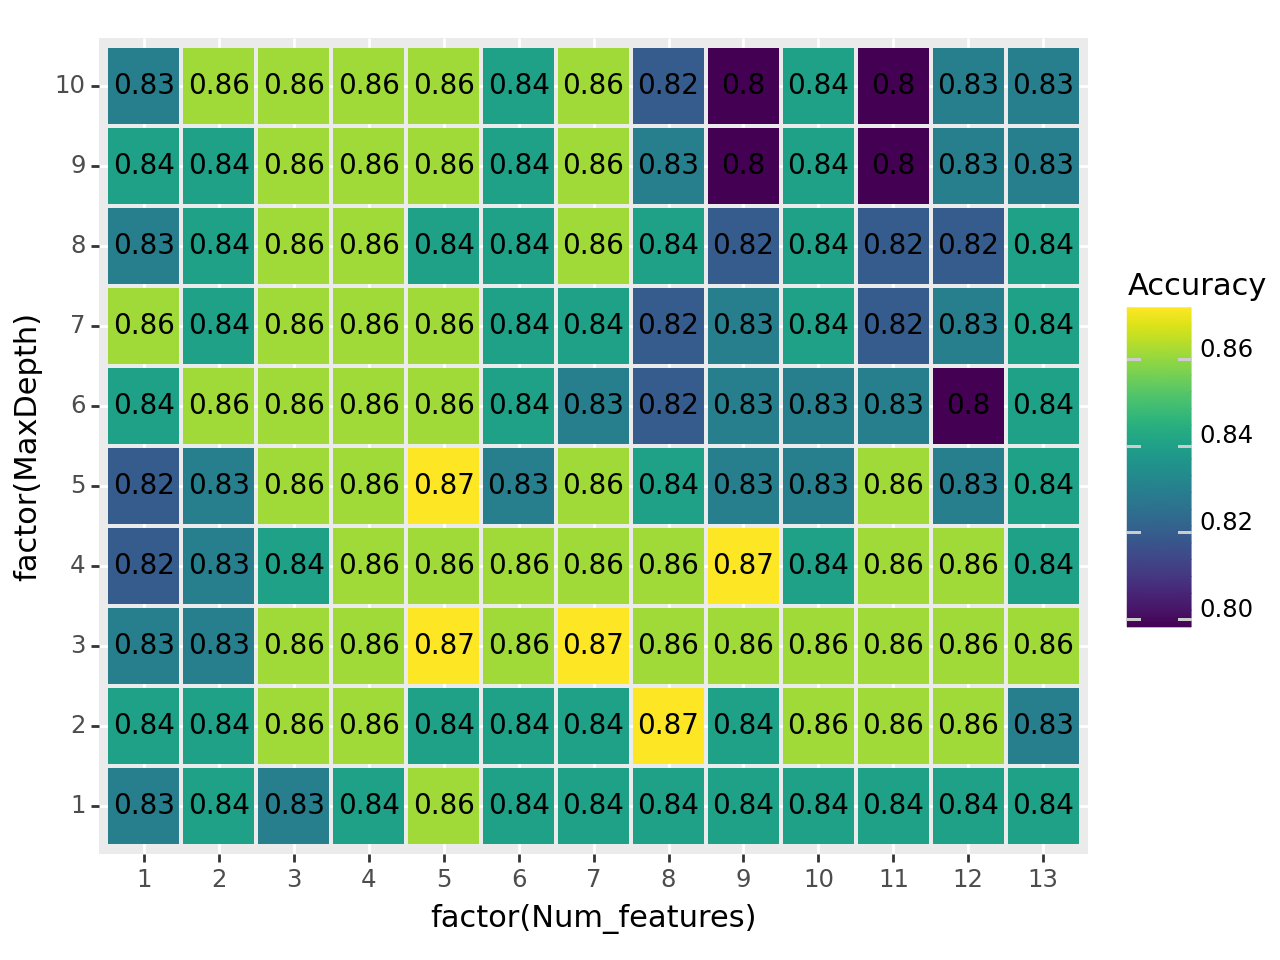

<Figure Size: (640 x 480)>

In [ ]:
# this code shows us a matrix of accuracies when tunning 2 hyperparameters at the same time
(ggplot(df_features_depth, aes('factor(Num_features)', 'factor(MaxDepth)', fill='Accuracy'))
 + geom_tile(aes(width=.95, height=.95))
 + geom_text(aes(label='Accuracy'), size=10)  # modified
)

## Task 3
Looking at our matrix of accuracies, What do you think? What combination of Max_Depth and Num_features would you pick?



**Answer for task 3:**
I would pick the combination of Max_Depth = 3 and Num_features = 5.

## Task 4
Make a list of all the Hyper parameters we have used so far for training Random Forests.

**Answer for task 4:**
The list of all the Hyper parameters that we used so far for training Random Forests are as follows:



1.   n_estimators
2.   max_features
3.   criterion
4.   max_depth
5.   max_leaf_nodes


